In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, GRU
import tensorflow as tf
from mlutils import plot

In [3]:
df = pd.read_csv('uci-news-aggregator.csv', encoding='ISO-8859-1') 

In [4]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [5]:
df = df.drop(['TIMESTAMP'], axis=1)

In [6]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com


In [7]:
df['CATEGORY']

0         b
1         b
2         b
3         b
4         b
         ..
422414    m
422415    m
422416    m
422417    m
422418    m
Name: CATEGORY, Length: 422419, dtype: object

In [8]:
df['ca_labels'] = df['CATEGORY'].map({'b':0, 't':1, 'e':2, 'm':3})

In [9]:
df['ca_labels']

0         0
1         0
2         0
3         0
4         0
         ..
422414    3
422415    3
422416    3
422417    3
422418    3
Name: ca_labels, Length: 422419, dtype: int64

In [10]:
y = df['ca_labels'].values

In [11]:
y

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df['TITLE'], y,test_size=0.33)

In [13]:
y_train

array([3, 1, 1, ..., 2, 2, 0], dtype=int64)

In [14]:
vocab_size = 2000
embedded_dim = 8
max_len = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [16]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x_train)

In [17]:
len(word_index)

64494

In [18]:
padded = pad_sequences(sequences,maxlen=max_len, truncating=trunc_type)

In [19]:
padded.shape

(283020, 120)

In [20]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len)

In [21]:
testing_padded.shape

(139399, 120)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [23]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [24]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test), validation_batch_size=64)

Epoch 1/10
4423/4423 [==============================] - 16s 4ms/step - loss: 0.5254 - acc: 0.7995 - val_loss: 0.3867 - val_acc: 0.8567
Epoch 2/10
4423/4423 [==============================] - 16s 4ms/step - loss: 0.3728 - acc: 0.8625 - val_loss: 0.3722 - val_acc: 0.8613
Epoch 3/10
4423/4423 [==============================] - 16s 4ms/step - loss: 0.3609 - acc: 0.8658 - val_loss: 0.3663 - val_acc: 0.8636
Epoch 4/10
4423/4423 [==============================] - 16s 4ms/step - loss: 0.3544 - acc: 0.8683 - val_loss: 0.3634 - val_acc: 0.8647
Epoch 5/10
4423/4423 [==============================] - 16s 4ms/step - loss: 0.3500 - acc: 0.8696 - val_loss: 0.3616 - val_acc: 0.8655
Epoch 6/10
4423/4423 [==============================] - 16s 4ms/step - loss: 0.3460 - acc: 0.8709 - val_loss: 0.3598 - val_acc: 0.8671
Epoch 7/10
4423/4423 [==============================] - 16s 4ms/step - loss: 0.3430 - acc: 0.8724 - val_loss: 0.3579 - val_acc: 0.8675
Epoch 8/10
4423/4423 [==============================] -

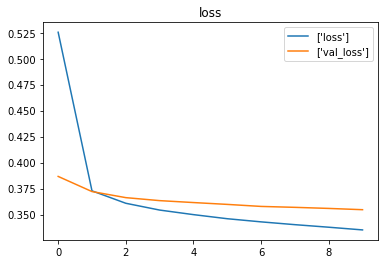

In [25]:
plot(hist)

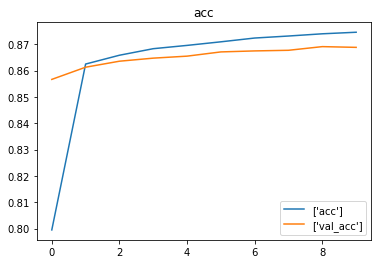

In [26]:
plot(hist, 'acc')

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.LSTM(15, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [28]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [29]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test), validation_batch_size=64)

Epoch 1/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.5354 - acc: 0.7869 - val_loss: 0.3805 - val_acc: 0.8585
Epoch 2/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.3665 - acc: 0.8637 - val_loss: 0.3622 - val_acc: 0.8647
Epoch 3/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.3493 - acc: 0.8702 - val_loss: 0.3492 - val_acc: 0.8692
Epoch 4/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.3386 - acc: 0.8734 - val_loss: 0.3446 - val_acc: 0.8712
Epoch 5/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.3305 - acc: 0.8764 - val_loss: 0.3377 - val_acc: 0.8738
Epoch 6/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.3241 - acc: 0.8786 - val_loss: 0.3344 - val_acc: 0.8755
Epoch 7/10
4423/4423 [==============================] - 39s 9ms/step - loss: 0.3190 - acc: 0.8808 - val_loss: 0.3333 - val_acc: 0.8759
Epoch 8/10
4423/4423 [==============================] -

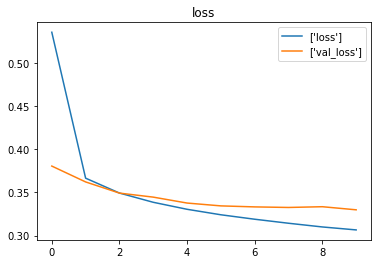

In [30]:
plot(hist)

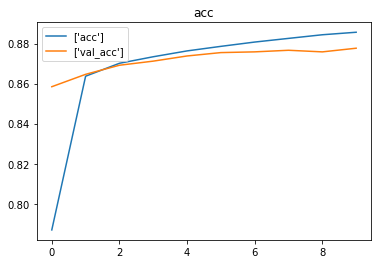

In [31]:
plot(hist, 'acc')

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(LSTM(15, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [33]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [34]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test), validation_batch_size=64)

Epoch 1/10
4423/4423 [==============================] - 60s 13ms/step - loss: 0.4646 - acc: 0.8214 - val_loss: 0.3581 - val_acc: 0.8661
Epoch 2/10
4423/4423 [==============================] - 58s 13ms/step - loss: 0.3515 - acc: 0.8680 - val_loss: 0.3481 - val_acc: 0.8684
Epoch 3/10
4423/4423 [==============================] - 60s 14ms/step - loss: 0.3389 - acc: 0.8728 - val_loss: 0.3426 - val_acc: 0.8701
Epoch 4/10
4423/4423 [==============================] - 58s 13ms/step - loss: 0.3304 - acc: 0.8762 - val_loss: 0.3370 - val_acc: 0.8739
Epoch 5/10
4423/4423 [==============================] - 58s 13ms/step - loss: 0.3238 - acc: 0.8787 - val_loss: 0.3358 - val_acc: 0.8747
Epoch 6/10
4423/4423 [==============================] - 58s 13ms/step - loss: 0.3189 - acc: 0.8808 - val_loss: 0.3328 - val_acc: 0.8758
Epoch 7/10
4423/4423 [==============================] - 58s 13ms/step - loss: 0.3141 - acc: 0.8828 - val_loss: 0.3306 - val_acc: 0.8769
Epoch 8/10
4423/4423 [==========================

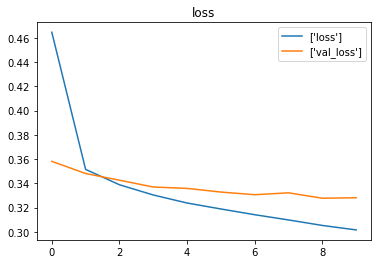

In [35]:
plot(hist)

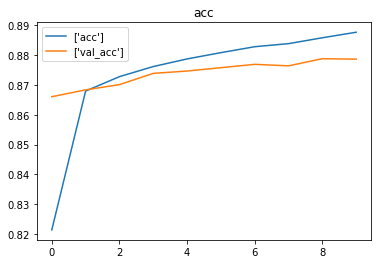

In [36]:
plot(hist, 'acc')

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.GRU(15, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [42]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [43]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test), validation_batch_size=64)

Epoch 1/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.4776 - acc: 0.8164 - val_loss: 0.3741 - val_acc: 0.8618
Epoch 2/10
4423/4423 [==============================] - 37s 8ms/step - loss: 0.3637 - acc: 0.8649 - val_loss: 0.3561 - val_acc: 0.8670
Epoch 3/10
4423/4423 [==============================] - 37s 8ms/step - loss: 0.3467 - acc: 0.8702 - val_loss: 0.3463 - val_acc: 0.8703
Epoch 4/10
4423/4423 [==============================] - 38s 9ms/step - loss: 0.3357 - acc: 0.8740 - val_loss: 0.3417 - val_acc: 0.8722
Epoch 5/10
4423/4423 [==============================] - 37s 8ms/step - loss: 0.3273 - acc: 0.8773 - val_loss: 0.3367 - val_acc: 0.8738
Epoch 6/10
4423/4423 [==============================] - 37s 8ms/step - loss: 0.3206 - acc: 0.8796 - val_loss: 0.3351 - val_acc: 0.8749
Epoch 7/10
4423/4423 [==============================] - 37s 8ms/step - loss: 0.3148 - acc: 0.8822 - val_loss: 0.3360 - val_acc: 0.8752
Epoch 8/10
4423/4423 [==============================] -

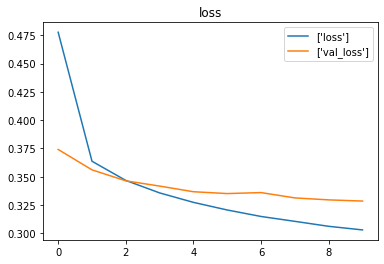

In [44]:
plot(hist)

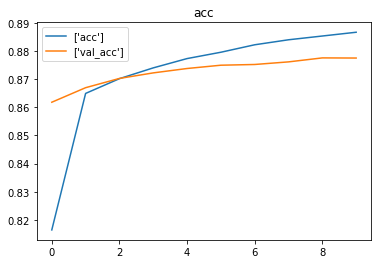

In [45]:
plot(hist, 'acc')

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(GRU(15, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [49]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [50]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test), validation_batch_size=64)

Epoch 1/10
4423/4423 [==============================] - 58s 13ms/step - loss: 0.4563 - acc: 0.8267 - val_loss: 0.3603 - val_acc: 0.8656
Epoch 2/10
4423/4423 [==============================] - 60s 14ms/step - loss: 0.3514 - acc: 0.8693 - val_loss: 0.3459 - val_acc: 0.8700
Epoch 3/10
4423/4423 [==============================] - 59s 13ms/step - loss: 0.3381 - acc: 0.8738 - val_loss: 0.3378 - val_acc: 0.8730
Epoch 4/10
4423/4423 [==============================] - 58s 13ms/step - loss: 0.3294 - acc: 0.8771 - val_loss: 0.3348 - val_acc: 0.8740
Epoch 5/10
4423/4423 [==============================] - 56s 13ms/step - loss: 0.3215 - acc: 0.8798 - val_loss: 0.3306 - val_acc: 0.8767
Epoch 6/10
4423/4423 [==============================] - 57s 13ms/step - loss: 0.3152 - acc: 0.8823 - val_loss: 0.3274 - val_acc: 0.8776
Epoch 7/10
4423/4423 [==============================] - 57s 13ms/step - loss: 0.3096 - acc: 0.8843 - val_loss: 0.3289 - val_acc: 0.8769
Epoch 8/10
4423/4423 [==========================

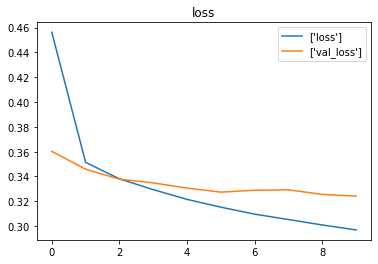

In [51]:
plot(hist)

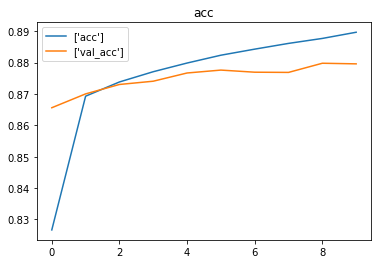

In [52]:
plot(hist, 'acc')

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 8)            16000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 128)          5248      
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 204       
Total params: 27,902
Trainable params: 27,902
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [59]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test), validation_batch_size=64)

Epoch 1/10
4423/4423 [==============================] - 19s 4ms/step - loss: 0.6049 - acc: 0.7513 - val_loss: 0.3862 - val_acc: 0.8580
Epoch 2/10
4423/4423 [==============================] - 19s 4ms/step - loss: 0.3676 - acc: 0.8635 - val_loss: 0.3597 - val_acc: 0.8661
Epoch 3/10
4423/4423 [==============================] - 19s 4ms/step - loss: 0.3501 - acc: 0.8695 - val_loss: 0.3493 - val_acc: 0.8694
Epoch 4/10
4423/4423 [==============================] - 19s 4ms/step - loss: 0.3413 - acc: 0.8718 - val_loss: 0.3432 - val_acc: 0.8715
Epoch 5/10
4423/4423 [==============================] - 19s 4ms/step - loss: 0.3349 - acc: 0.8738 - val_loss: 0.3410 - val_acc: 0.8716
Epoch 6/10
4423/4423 [==============================] - 19s 4ms/step - loss: 0.3298 - acc: 0.8755 - val_loss: 0.3393 - val_acc: 0.8724
Epoch 7/10
4423/4423 [==============================] - 19s 4ms/step - loss: 0.3261 - acc: 0.8775 - val_loss: 0.3370 - val_acc: 0.8731
Epoch 8/10
4423/4423 [==============================] -

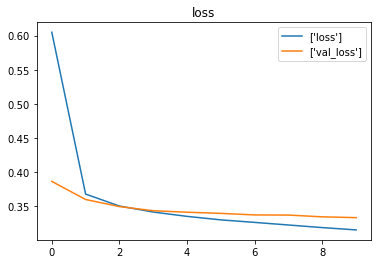

In [60]:
plot(hist)

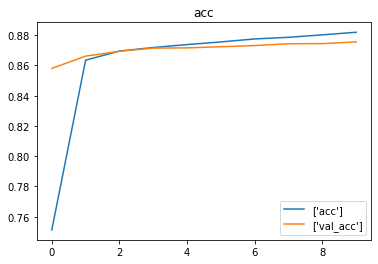

In [61]:
plot(hist, 'acc')